In [1]:
import pandas as pd
import numpy as np

In [2]:
#df= pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df=pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df2=df2.drop(columns=['Class'])
for i in range(0,11598):
    if int(df.at[i,'Class'])<5:
        df.at[i,'Class']=1
    else:
        df.at[i,'Class']=0
#df = pd.concat([df, df2], axis=1)

In [3]:
X=df.loc[:, df.columns != 'Class']


In [4]:
Y=df.loc[:,'Class']


In [ ]:
folder='fs_chi'

In [5]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
import tracemalloc
import os
import psutil
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std

In [ ]:
# Feature extraction
acc=[]
for i in range(2,471):
    test = SelectKBest(score_func=chi2, k=i)
    fit = test.fit(X, Y)
    X_f = fit.transform(X)
    model = lgb.LGBMClassifier().fit(X_f,Y)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    acc.append(mean(scores))
    print('>%.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
import matplotlib.pyplot as plt
t=[]
for i in range(2,470):
    t.append(i)
x_axis = np.arange(len(t))
ind = np.arange(len(t)) 
width = 0.1
plt.plot(t, acc[:-1])
 
# naming the x axis
plt.xlabel('Number of features')
# naming the y axis
plt.ylabel('Accuracy')
#plt.yticks('2','10','11','12')
# giving a title to my graph
plt.title('Accuracy at different feature set size using Chi-Square Test')
plt.savefig('paper/Accuracy at different feature set size using Chi-Square Test.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight') 

In [ ]:
i=10
for a in acc:
    if a>0.98:
        print(i,' ',a)
    i=i+1

In [ ]:
import tracemalloc
import os
import psutil
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
#x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
model = lgb.LGBMClassifier().fit(X,Y)
#model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],          verbose=20,eval_metric='logloss')

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('>%.4f (%.4f)' % ( mean(scores), std(scores)))

In [7]:
acc=[]
acc.append(0.980082686223756)
pre=[]
rec=[]
f1=[]
tim=[]
mem=[]

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = lgb.LGBMClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  2.53125
memory (13156269, 37230040)
>a 0.9794 (0.0036)
>p 0.9839 (0.0033)
>r 0.9919 (0.0025)
>f1 0.9879 (0.0021)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = RandomForestClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  3.09375
memory (13436401, 37230040)
>a 0.9772 (0.0034)
>p 0.9809 (0.0034)
>r 0.9925 (0.0025)
>f1 0.9870 (0.0017)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = GaussianNB().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  0.046875
memory (12811933, 37230040)
>a 0.8629 (0.0163)
>p 0.9427 (0.0093)
>r 0.8922 (0.0219)
>f1 0.9166 (0.0109)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = SVC(kernel ='rbf', random_state = 1).fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  5.515625
memory (16693876, 37230040)
>a 0.8576 (0.0026)
>p 0.8581 (0.0023)
>r 0.9963 (0.0020)
>f1 0.9220 (0.0013)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = tree.DecisionTreeClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  2.296875
memory (12931268, 36010169)
>a 0.9668 (0.0055)
>p 0.9784 (0.0049)
>r 0.9815 (0.0043)
>f1 0.9799 (0.0029)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = LogisticRegression().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

C:\Users\Vidhi Bansal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


time  1.40625
memory (24678382, 36010169)
>a 0.9004 (0.0088)
>p 0.9153 (0.0081)
>r 0.9723 (0.0056)
>f1 0.9429 (0.0049)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = ExtraTreesClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  1.984375
memory (13384311, 37230040)
>a 0.9733 (0.0039)
>p 0.9764 (0.0037)
>r 0.9915 (0.0028)
>f1 0.9845 (0.0022)


In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = AdaBoostClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  2.40625
memory (13619092, 37230040)
>a 0.9634 (0.0047)
>p 0.9687 (0.0044)
>r 0.9886 (0.0035)
>f1 0.9785 (0.0027)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = BaggingClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  3.609375
memory (13433043, 37230040)
>a 0.9736 (0.0042)
>p 0.9837 (0.0043)
>r 0.9853 (0.0038)
>f1 0.9848 (0.0027)


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = GradientBoostingClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  9.890625
memory (13924648, 37230040)
>a 0.9692 (0.0043)
>p 0.9714 (0.0044)
>r 0.9928 (0.0025)
>f1 0.9820 (0.0025)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = KNeighborsClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

time  0.0
memory (13671945, 37230040)
>a 0.9186 (0.0047)
>p 0.9364 (0.0044)
>r 0.9696 (0.0040)
>f1 0.9527 (0.0027)


In [80]:
acc=[0.980082686223756,0.9756,
 0.9777258437217974,
 0.862908001348765,
 0.8575615869804527,
 0.9668331796138169,
 0.9004432080767208,0.9733,0.9634,0.9736,0.9692,0.9186 ]
#acc

In [79]:
pre=[0.9838561501006995,0.9784,
 0.981054219573419,
 0.9426974749754735,
 0.8580625393834619,
 0.9784349872093681,
 0.915258630315717,0.9764,0.9687,0.9837,0.9714,0.9364]
#pre

In [81]:
rec=[0.9919414106111354,0.9934 ,
 0.9926896059137212,
 0.8922101215613666,
 0.9962937998848879,
 0.9815361251534255,
 0.9723214545757143,0.9915,0.9886,0.9853,0.9928,0.9696]
#rec

In [75]:
len(rec)

14

In [67]:
f1=[0.9878782155255005,0.9857 ,
 0.9869215801198996,
 0.9165587191753655,
 0.9220226852329794,
 0.9798868211024274,
 0.9429004362267244,0.9845,0.9785,0.9842,0.9820,0.9527]

In [83]:
tim=[2.40625,7.265625, 3.09375, 0.09375, 5.515625, 2.296875, 1.421875,1.984375,2.40625,3.609375,9.890625,0.0]

In [34]:
mem=[(76325, 17529264), (12552200, 30268274),
 (12285312, 19074825),
 (12334337, 32130452),
 (16215137, 36010169),
 (12931209, 36010169),
 (24679379, 36010169)]

In [52]:
len(acc)

12

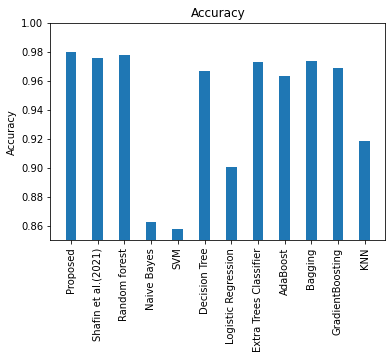

In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','GradientBoosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, acc, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Accuracy")
#plt.legend()
plt.title("Accuracy")
# Display

plt.savefig('paper/Accuracy.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

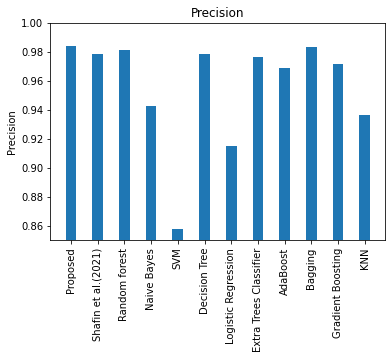

In [72]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, pre, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Precision")
#plt.legend()
plt.title("Precision")
# Display

plt.savefig('paper/Precision.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

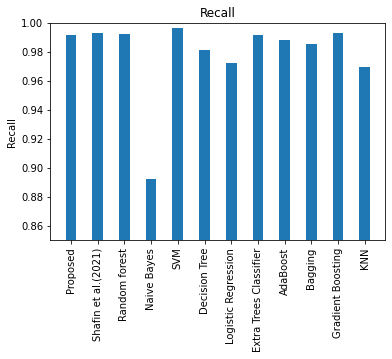

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind,rec, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Recall")
#plt.legend()
plt.title("Recall")
# Display

plt.savefig('paper/Recall.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

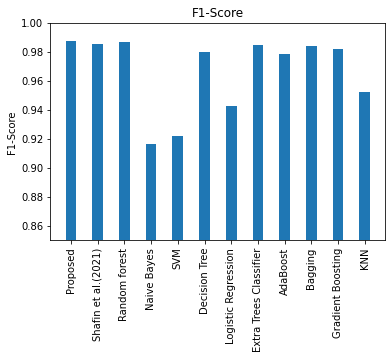

In [74]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind,f1, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("F1-Score")
#plt.legend()
plt.title("F1-Score")
# Display

plt.savefig('paper/F1-Score.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

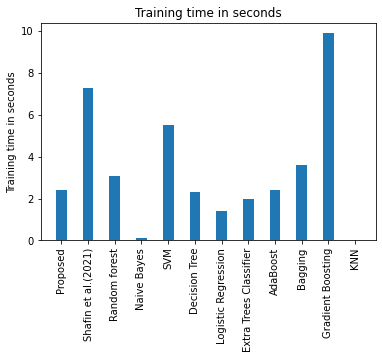

In [85]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, tim, width)
#plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Training time in seconds")
#plt.legend()
plt.title("Training time in seconds")
# Display

plt.savefig('paper/Training time in seconds.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')